<a href="https://colab.research.google.com/github/siddarthachk/Stock-Market-Analysis-Nifty-Sensex-/blob/main/Nifty_50_%26_Sensex_Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Libraries

In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Index Symbols and Date Range

In [21]:
nifty_symbol = "^NSEI" # NIFTY 50
sensex_symbol = "^BSESN" # SENSEX

start_date = "2019-01-01"
end_date = "2025-01-01"

3. Download Data

In [22]:
nifty = yf.download(nifty_symbol, start=start_date, end=end_date)
sensex = yf.download(sensex_symbol, start=start_date, end=end_date)

/tmp/ipython-input-2516807194.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty = yf.download(nifty_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2516807194.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sensex = yf.download(sensex_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


4. Data Cleaning

In [23]:
nifty.dropna(inplace=True)
sensex.dropna(inplace=True)

5. Daily Returns Calculation

In [24]:
nifty['Daily Return'] = nifty['Close'].pct_change()
sensex['Daily Return'] = sensex['Close'].pct_change()

6. Volatility & Average Returns

In [25]:
nifty_volatility = nifty['Daily Return'].std()
sensex_volatility = sensex['Daily Return'].std()


nifty_avg_return = nifty['Daily Return'].mean()
sensex_avg_return = sensex['Daily Return'].mean()


print("NIFTY 50 Average Daily Return:", nifty_avg_return)
print("NIFTY 50 Volatility:", nifty_volatility)


print("SENSEX Average Daily Return:", sensex_avg_return)
print("SENSEX Volatility:", sensex_volatility)

NIFTY 50 Average Daily Return: 0.0005987083702562973
NIFTY 50 Volatility: 0.011568471429068701
SENSEX Average Daily Return: 0.0005974261928824682
SENSEX Volatility: 0.011733324624957497


7. Moving Averages

In [26]:
for df in [nifty, sensex]:
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()

8. Price Trend Visualization

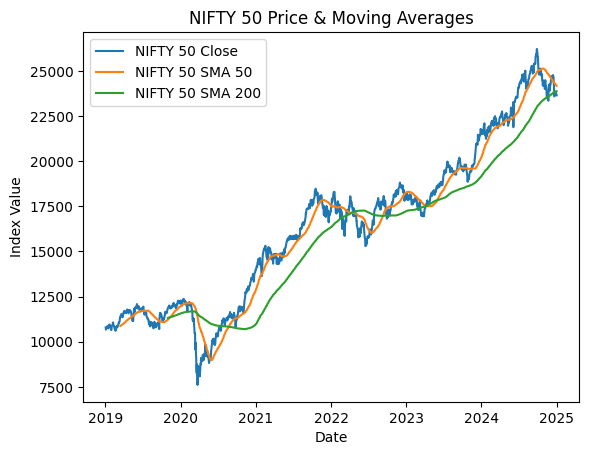

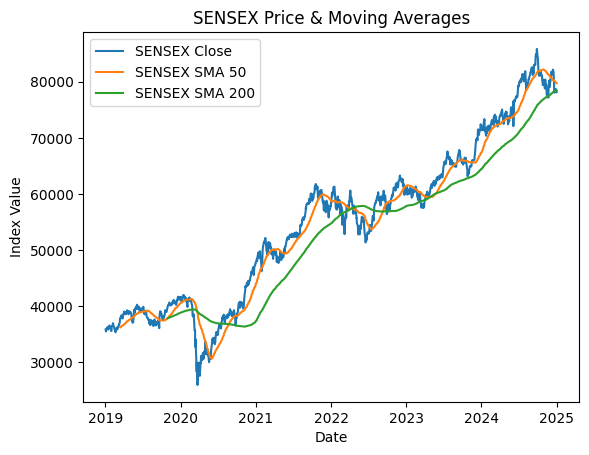

In [27]:
plt.figure()
plt.plot(nifty['Close'], label='NIFTY 50 Close')
plt.plot(nifty['SMA_50'], label='NIFTY 50 SMA 50')
plt.plot(nifty['SMA_200'], label='NIFTY 50 SMA 200')
plt.title('NIFTY 50 Price & Moving Averages')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.show()


plt.figure()
plt.plot(sensex['Close'], label='SENSEX Close')
plt.plot(sensex['SMA_50'], label='SENSEX SMA 50')
plt.plot(sensex['SMA_200'], label='SENSEX SMA 200')
plt.title('SENSEX Price & Moving Averages')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.show()

9. Volatility Comparison Visualization

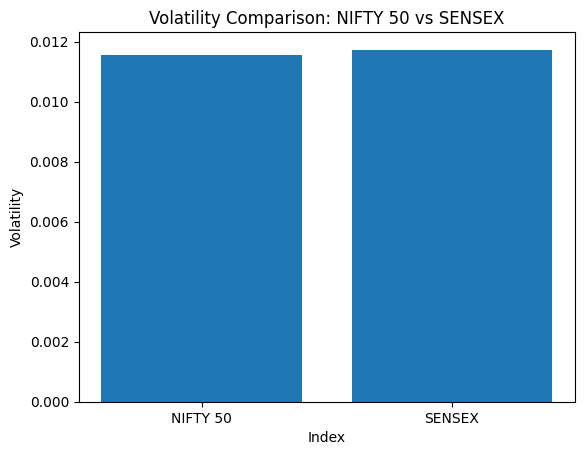

In [28]:
volatility_df = pd.DataFrame({
'Index': ['NIFTY 50', 'SENSEX'],
'Volatility': [nifty_volatility, sensex_volatility]
})


plt.figure()
plt.bar(volatility_df['Index'], volatility_df['Volatility'])
plt.title('Volatility Comparison: NIFTY 50 vs SENSEX')
plt.xlabel('Index')
plt.ylabel('Volatility')
plt.show()

10. Cumulative Returns Visualization

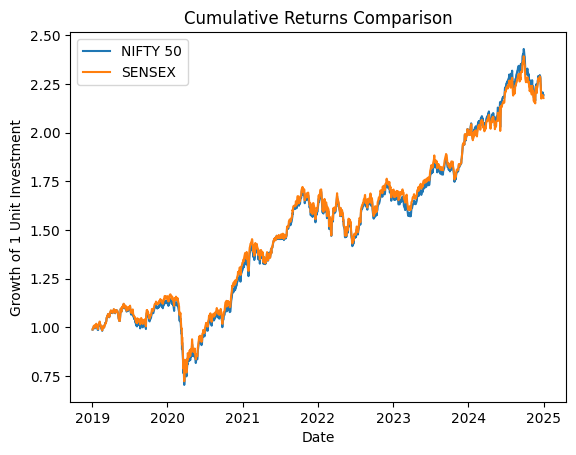

In [29]:
nifty['Cumulative Return'] = (1 + nifty['Daily Return']).cumprod()
sensex['Cumulative Return'] = (1 + sensex['Daily Return']).cumprod()


plt.figure()
plt.plot(nifty['Cumulative Return'], label='NIFTY 50')
plt.plot(sensex['Cumulative Return'], label='SENSEX')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Growth of 1 Unit Investment')
plt.legend()
plt.show()

11. Conclusion

In [30]:
print("\nConclusion:")
print("This analysis compares NIFTY 50 and SENSEX based on returns, volatility, and trends.")
print("Moving averages help identify long-term market direction.")
print("Such analysis is useful for index-based investment decisions.")


Conclusion:
This analysis compares NIFTY 50 and SENSEX based on returns, volatility, and trends.
Moving averages help identify long-term market direction.
Such analysis is useful for index-based investment decisions.
